In [29]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline 

In [30]:
# import all pyphysio classes and methods
import pyphysio as ph

In [31]:
# import data and creating a signal
df_BVP = pd.read_csv('BVP_pp9.csv', header=None)


In [32]:
#count rows 
n_of_rows = df_BVP.count()
print(n_of_rows)

0    238634
dtype: int64


In [33]:
#count n of rows to get time of recording (s) 
n_of_rows = df_BVP.count()
print(n_of_rows)
#walk time in seconds 
walk_time_seconds = n_of_rows/64
print(walk_time_seconds)
#walk time in minutes
walk_time_minutes = walk_time_seconds/60
print(walk_time_minutes)


0    238634
dtype: int64
0    3728.65625
dtype: float64
0    62.144271
dtype: float64


In [34]:
#create BVP signal 
fsamp = 64  #64 Hz 
t_start = 0

ecg = ph.EvenlySignal(values = df_BVP, sampling_freq = fsamp, signal_type = 'ecg')

In [35]:
print(ecg.get_start_time())

0


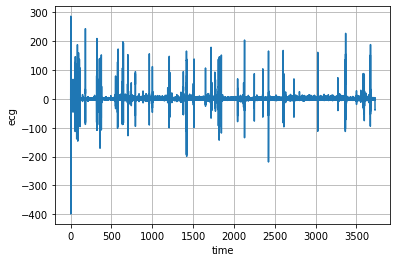

In [36]:
ecg.plot()

In [37]:
ibi = ph.BeatFromECG()(ecg)

In [38]:
ibi.get_duration() #seconds 

3728.65625

In [39]:
# create label
label = np.zeros(3729)
label[0:600] =1
label[600:3729] = 2

label = ph.EvenlySignal(label, sampling_freq = 1, signal_type = 'label') 
#sampling_freq here is not intended as real sampfeq, only the distance between one point and the other (e.g. 10 = 10 units between 'begin' & 'end')

In [40]:
# (optional) IIR filtering : remove high frequency noise
#ecg = ph.IIRFilter(fp=45, fs = 50, ftype='ellip')(ecg)

In [41]:
# normalization : normalize data
ecg = ph.Normalize(norm_method='standard')(ecg)

In [42]:
# resampling : increase the sampling frequency by cubic interpolation
ecg = ecg.resample(fout=4096, kind='cubic')
fsamp = 4096

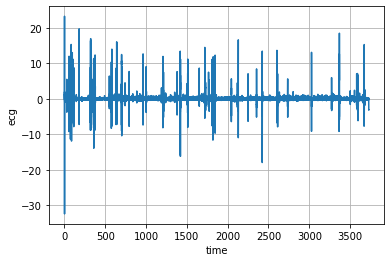

In [43]:
ecg.plot()

In [44]:
ibi = ph.BeatFromECG()(ecg)

In [45]:
ibi.get_duration()


3728.65625

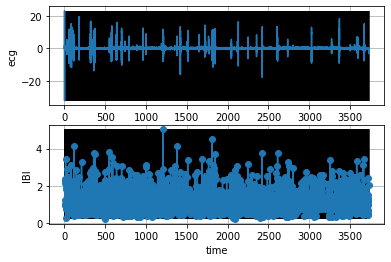

In [49]:
# check results so far
ax1 = plt.subplot(211)
ecg.plot()
plt.vlines(ibi.get_times(), np.min(ecg), np.max(ecg))

plt.subplot(212, sharex = ax1)
ibi.plot('o-')
plt.vlines(ibi.get_times(), np.min(ibi), np.max(ibi))
plt.show()

In [50]:
### physiological indicators 

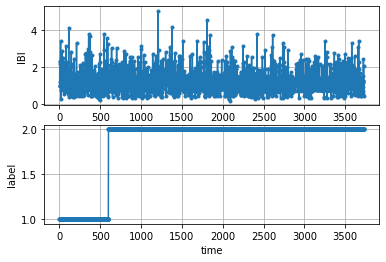

In [51]:
# check label
ax1 = plt.subplot(211)
ibi.plot('.-')

plt.subplot(212, sharex = ax1)
label.plot('.-')
plt.show()

In [52]:
# define a list of indicators we want to compute
hrv_indicators = [ph.Mean(name='RRmean'), ph.StDev(name='RRstd'), ph.RMSSD(name='rmsSD')]

In [53]:
#fixed length windowing
fixed_length = ph.FixedSegments(step = 60, width = 60, labels = label)

indicators, col_names = ph.fmap(fixed_length, hrv_indicators, ibi)

In [54]:
# extract column with the labels for each window
label_w = indicators[:, np.where(col_names == 'label')[0]]

# extract column with the RRmean values computed from each window
rrmean_w = indicators[:, np.where(col_names == 'RRmean')[0]]

rrmean_image1 = rrmean_w[np.where(label_w==1)[0]].ravel()
rrmean_image2 = rrmean_w[np.where(label_w==2)[0]].ravel()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a92cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a932990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a92c2d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c1a932f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a790990>,
 'means': []}

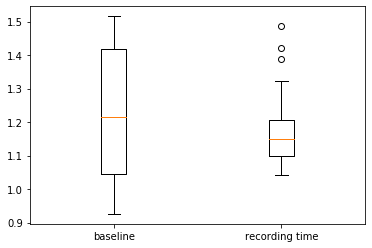

In [55]:
## create a box and whisker plot to compare the distibution of the RRmean indicator
plt.boxplot([rrmean_image1, rrmean_image2],
            labels=['baseline', 'recording time'])

In [56]:
HRV_FD = ph.preset_hrv_fd() #frequency domain HRV indicators
print(HRV_FD)

print(HRV_FD[0].get())

[IBI_VLF_Pow, IBI_LF_Pow, IBI_HF_Pow, IBI_Total_Pow]
{'freq_min': 1e-05, 'freq_max': 0.04, 'method': 'ar', 'interp_freq': 4, 'name': 'IBI_VLF_Pow'}


In [57]:
FD_HRV_ind, col_names = ph.fmap(fixed_length, ph.preset_hrv_fd(), ibi.resample(4))

In [58]:
import pandas as pd

# create a pandas dataframe
FD_HRV_pp9_df = pd.DataFrame(FD_HRV_ind, columns=col_names)

FD_HRV_pp9_df

,begin,end,label,IBI_VLF_Pow,IBI_LF_Pow,IBI_HF_Pow,IBI_Total_Pow
0,1.229736,61.229736,1.0,286.547654,611.352321,701.735438,2198.480967
1,61.229736,121.229736,1.0,224.262635,697.278156,962.566776,2551.786556
2,121.229736,181.229736,1.0,289.563429,586.739027,910.758430,2501.462591
3,181.229736,241.229736,1.0,376.377442,834.361312,912.554787,2824.636958
4,241.229736,301.229736,1.0,118.702894,385.927089,944.007106,2161.888898
...,...,...,...,...,...,...,...
56,3421.229736,3481.229736,2.0,171.743826,567.233499,896.595461,2361.054331
57,3481.229736,3541.229736,2.0,257.627527,654.863625,811.086807,2341.733360
58,3541.229736,3601.229736,2.0,283.639232,704.802198,981.267773,2588.779671
59,3601.229736,3661.229736,2.0,226.845944,554.604481,736.256847,2239.822175


In [28]:
#save data 
FD_HRV_pp9_df.to_csv('FD_HRV_pp9.csv')